# One-Way ANOVA：方差分析研究X(定类)对于Y(定量)的差异
背景：为了调查吃巧克力对心血管健康的影响，实验由三种类型的巧克力组成：100g的黑巧克力，含有200mg全脂牛奶的100g黑巧克力和200g的牛奶巧克力。12个实验对象：7女5男。在不同的天数里，每个实验对象将吃一种类型的巧克力，一个小时后测量他们血浆的总抗氧能力。 
这是一个因子水平数 𝑎 = 3 和重复次数 𝑛 = 12 的单因子实验。

自变量：巧克力种类Chocolate
因变量：血浆的总抗氧能力(Capacity)


# 问题1 
试判断食用的 3 种巧克力对心血管健康的影响是否有差异.
检验假设 $H_0:\mu_1=\mu_2=\mu_3$ v.s. $H_1:\mu_1，\mu_2，\mu_3$不全相等

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import f
alpha = 0.05
a = 3
n = 12
x=pd.read_csv('Project1.csv')

In [2]:
data=x.values[:,1:3]  #将data读到多维度列表
print(data.shape)

(36, 2)


In [3]:
#分组
#注意这里的python语法
group1 = data[data[:,0] == 1,1]
group2 = data[data[:,0] == 2,1]
group3 = data[data[:,0] == 3,1]
print(len(group1)) #每组都是12个

12


In [4]:
#关键代码
df = pd.DataFrame(data, columns = ['chocolate', 'capacity'])   
model = ols('capacity ~ C(chocolate)', df).fit()#!!!注意这个ols的名字方式，之前一直错在这里
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               capacity   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.58
Date:                Wed, 03 Mar 2021   Prob (F-statistic):           2.52e-14
Time:                        10:54:00   Log-Likelihood:                -91.726
No. Observations:                  36   AIC:                             189.5
Df Residuals:                      33   BIC:                             194.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             116.0583      0.932    124.466      0.000     114.161     117.955
C(chocolate)[T.2.0]   -15.3583      1.319    -11.647      0.000     -18.041     -12.675
C(chocolate)[T.3.0]   -15.8750      1.319    -12.039      0.000     -18.558     -13.192
==============================================================================
Omnibus:                        2.959   Durbin-Watson:                   2.299
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                1.725
Skew:                          -0.412   Prob(JB):                        0.422
Kurtosis:                       3.686   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## OLS回归
OLS回归分析用于研究X(定量或定类)对Y(定量)的影响关系，是否有影响关系，影响方向及影响程度情况如何；


In [5]:
anovaResults = round(anova_lm(model), 2)#2是保留几位小数的意思
print('The ANOVA table: \n', anovaResults)  
#? 为什么这里打出来自由度是1呢
F0, pVal1 = stats.f_oneway(group1, group2, group3)

The ANOVA table: 
                 df   sum_sq  mean_sq      F  PR(>F)
C(chocolate)   2.0  1952.64   976.32  93.58     0.0
Residual      33.0   344.31    10.43    NaN     NaN


注意这里自由度的公式定义:
dfn=a-1
dfd=a(n-1)

In [6]:
# 法1：p值
if pVal1 < alpha:
    print(pVal1)
    print('\nSince p-value < 0.05, reject H0.')
else:
    print('\nAccept H0.') 
    
# 法2：拒绝域
F = round(f.ppf(0.95,dfn = 2,dfd = 33), 2)

if F0 > F:
    print(F0)
    print('Since F0 > F(0.05,2,33) = ', F, ', reject H0.')
else:
    print('Accept H0.') 
    

2.5152590041683006e-14

Since p-value < 0.05, reject H0.
93.57559776071176
Since F0 > F(0.05,2,33) =  3.28 , reject H0.


法1告诉我们p<0.05,拒绝原假设；法1告诉我们F值大于3.28，与p值的结果一致，拒绝原假设。不同Chocolate样本对于Capacity全部均呈现出显著性(p<0.05)，即不同Chocolate样本对于Capacity均有着差异性。

# 问题2
试判断该实验用One-way ANOVA模型是否恰当.
判断One-way ANOVA模型是否恰当，即是从3个角度判断模型假设的合理性(2.1-2.3)：

## 2.0 均值模型和效率模型
均值模型：
$y_{ij}=\mu_i+\epsilon_{ij}$，其中，$\epsilon_{ij}$是独立同分布，服从于正态分布，$N(0,\sigma^2)$。这里确定的$\mu$，一部分与$i$有关，一部分无关。$\mu_i=\mu+\alpha_i$,添加一个约束:$\mu=\frac{1}{m}\sum ^m\mu_i$

对于等式$\mu_i=\mu+\alpha_i$左右两边同时对i求和，可得$\sum\alpha_i=0$,这个$\sum\alpha_i=0$就是约束，下面给出效率模型的定义：

$y_{ij}=\mu_i+\epsilon_{ij}+\alpha_i$

- 2.1 独立性检验
- 2.2 方差齐性检验
- 2.3 正态性检验


## 2.1 独立性检验
通常来说，我们需要必要的随机化实验次序来防止未知干扰因子的影响，但是在本次探究吃巧克力对心血管健康的影响中，实验次序本身具有随机性，就无需再随机化了，所以在这里没有采用依照收集数据的时间顺序，而是采用DW独立性检验来检验分析中【残差】的一阶自相关性。
观测到的叫**残差**$e_{ij}=y_{ij}-\hat{y_{ij}}$

这里，一阶自相关性即为线性表示的残差一阶相关性方程:$e_i = \rho * e_{i-1} + v_i$

DW 独立性检验的$H_0$和$H_1$分别为：
$H_0:\rho = 0 v.s. H_1\rho \neq 0$  

检验统计量为：$d = \frac{\sum^T_{t=2}\quad(e_i-e_{i-1})^2}{\sum^T_{t=1}\quad e_i^2}$  


In [7]:
def durbin_watson(residuals):
    nume = sum(np.diff(residuals.T) ** 2)
    deno = sum(residuals ** 2)
    return nume / deno

In [8]:
data_group=[group1,group2,group3]
data_group_mean=[]#各组均值
data_residual=[]
data_residal_bygroup=[]#按组聚集的偏差
for group in data_group:
    group_mean=np.mean(group)
    print(group_mean)
    data_group_mean.append(group_mean)
    group_residual_list=[]
    for item in group:
        residual=item-group_mean
        group_residual_list.append(residual)
        data_residual.append(residual)
    data_residal_bygroup.append(group_residual_list)
data_residual=np.array(data_residual)
dw = durbin_watson(data_residual)
print('Durbin-Watson检验的统计量为：', round(dw,2))

116.05833333333334
100.7
100.18333333333332
Durbin-Watson检验的统计量为： 2.3


由分析可知，Durbin-Watson检验的统计量为：2.3，在 1~3 之间且比较接近2，故没有违反独立性的假定。

## 2.2 方差齐性检验(同质)
方差齐性检验即是去每组的方差是一致的。使用方差齐性检验，去检验各个组别数据的波动情况(标准差)是否有明显的差异
方差齐性检验的方法有如下两种：
- Bartlett检验:正态性敏感
- Levene检验:较为Robust
### 2.2.1 Bartlett检验
Bartlett检验的原假设$H_0$为各数据间具有方差齐性。
Bartlett检验统计量为：$\chi_0^2 = 2.3026\frac{q}{c}$  
其中，$q = (N - a)log_{10}S_p^2 - \sum_{i=1}^a(n_i - 1)log_{10}S_i^2$  
$c = 1 + \frac{1}{3(a-1)}(\sum_{i=1}^a(n_i-1)^{-1} - (N - a)^{-1})$  
$S_p^2 = \frac{\sum_{i=1}^a\quad(n_i-1)S_i^2}{N - a}$ 且$S_i^2$是第 $i$ 个总体的样本方差；当$\chi_0^2 > \chi_{\alpha,a-1}^2$ 时，拒绝$H_0$，其中$\chi_{\alpha,a-1}^2$是自由度为$a-1$的卡方分布上的 $\alpha$ 分位数。
下面使用stats库中的bartlett包进行方差齐性检验

In [9]:
# 用Bartlett检验进行方差齐性检验
bart, pVal2 = stats.bartlett(group1, group2, group3)
bart_stat = stats.chi2.isf(alpha, a-1)

# p值：
print('Bartlett检验的P值为：', round(pVal2, 2))
if pVal2 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

# 检验统计量与拒绝域：
print('Bartlett检验统计量：', round(bart, 2))
print('𝜒_(𝛼,𝑎−1)^2: ', round(bart_stat, 2))
if bart > bart_stat:
    print('Since 𝜒_0^2 > 𝜒_(𝛼,𝑎−1)^2, reject H0.')
else:
    print('Accept H0')  

Bartlett检验的P值为： 0.81
Accept H0
Bartlett检验统计量： 0.42
𝜒_(𝛼,𝑎−1)^2:  5.99
Accept H0


由分析可知，Bartlett检验接受原假设，即残差具有方差齐性。

### 2.2.2 Levene检验
Levene检验的原假为设$H_0$为各数据间具有方差齐性。
下面使用p值进行Levene方差齐性检验

In [10]:
# 用Levene检验进行方差齐性检验
lene, pVal3 = stats.levene(group1, group2, group3)
print('Levene检验的P值为：', round(pVal3, 2))
if pVal3 < alpha:
    print('Since p-value < 0.05, reject H0.')
else:
    print('Accept H0')  

Levene检验的P值为： 0.98
Accept H0


由分析可知，Levene检验检验的P值大于 0.05，故接受原假设，即残差具有方差齐性。符合使用one-way Anova的条件

## 2.3 正态性检验
### 2.3.1 画qq图
利用qq图（The quantitle-quantile plot），来检验数据分布的相似性。

原理：

qq横坐标为某一样本的分位数，纵坐标为另一样本分位数，若两样本分布相同，则散点图中的点在y=x附近。

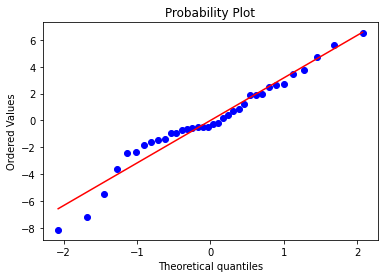

In [11]:
fig = plt.figure()
res = stats.probplot(data_residual, plot=plt)
plt.show()

qq图的分析：
总体上可以看出，residual散点近似呈一条直线，误差分布是近似正态的。

### 2.3.2 定量正态性检验：S-W/K-S
小样本(小于50)时建议使用S-W(Shapiro-Wilk)检验，大样本(大于50)时,则使用K-S检验；
S-W(Shapiro-Wilk)检验的原假设为，认为样本来自于正态分布的总体

In [12]:
# 用Shapiro-Wilk检验进行正态性检验
SW, pVal4 = stats.shapiro(data_residual)
print(round(SW, 2))
print(round(pVal4, 2))

if pVal4 > alpha:
    print('\nAccept the null hypothesis.')
else:
    print('\nSince p-value > 0.05, reject the null null hypothesis')

0.96
0.26

Accept the null hypothesis.


# 问题3 估计食用这 3 种巧克力 1h 后血浆的总抗氧能力均值和误差的方差.


$\sum_{i=1}^{a}\sum_{j=1}^m(y_{ij}-\bar{y_{..}})^2$为总偏差平方和$SS_T$
如果$H_0$不成立，所有样本不是同分布的，属于不同总体。我们去看各组数据的方差分别是什么，并将方差加起来得到$SS_T$。

## 总抗氧能力均值为:

In [13]:
data_group_mean

[116.05833333333334, 100.7, 100.18333333333332]

$\sum_{i=1}^{a}\sum_{j=1}^m(y_{ij}-\bar{y_{i.}})^2$则为误差平方和$SS_E$

In [14]:
# 计算sse法1
sse1=0
for group,mean in zip(data_group,data_group_mean):
    for item in group:
        sse1=sse1+(item-mean)**2
print("\n sse1为",sse1)
# 计算sse法2
sse2=0
for group in data_residal_bygroup:
    for item_resi in group:
        sse2=sse2+item_resi**2
print("\n sse2为",sse2)
# 计算误差的方差
var = round(sse2 / (a * (n - 1)),2) 
print('误差的方差为：{0}'.format(var))



 sse1为 344.30583333333317

 sse2为 344.30583333333317
误差的方差为：10.43


由上述分析可知，3 种不同巧克力下的capacity均值的估计值分别为：116.05833333333334, 100.7, 100.18333333333332
其方差的估计值为：10.43

# 问题4 若Q1判断存在差异，请进行多重比较(LSD方法).
方差分析存在显著性差异(Q1的结果)，是进行事后多重比较的前提。
由Q1的分析可知，3 种不同巧克力下的capacity存在显著性(alpha=0.05)差异，
即单因素方差分析的结果如果呈现出显著性，说明不同组别之间确实存在显著差异，但为了进一步确定具体有哪些组是有差异的，我们需要进行多重比较。

这里采用Fisher最小显著性差异（LSD）方法，要进行$C_a^2$种比较;
## 4.1 LSD v.s. Bonferrnoi校正
将LSD 类比 Bonferrnoi校正方法,Bonferrnoi校正方法过于保守没有用足alpha=0.05 的这一条件。所以这里应用LSD进行多重比较。
## LSD 多重比较：
$ H_0: \mu_i = \mu_j$ v.s. $H_1: \mu_i \neq \mu_j$  


In [15]:
#LSD(least significant difference)最小显著差异
mu_1 = np.mean(group1)
mu_2 = np.mean(group2)
mu_3 = np.mean(group3)
mu = [mu_1, mu_2, mu_3]

def LSD():   
    df = a * (n-1)#自由度
    t_value = stats.t(df).isf(alpha / 2)    
    mse = var
    lsd = t_value * math.sqrt(2.0 * mse / n)
    # print(lsd)
    return lsd

for i in range(a):
    for j in range(i + 1,a):
        dist = round(abs(mu[i] - mu[j]), 1)
        print('The difference between group', i + 1, 'and group', j + 1, ': ', dist)
print('Value of LSD: ', round(LSD(),2))
        
cmp = 0
for s in range(a):
    for t in range(i + 1, a):
        lsd = LSD()
        dist = round(abs(mu[s] - mu[t]), 1)
        if(dist < lsd):
            print('No difference between group', s + 1, 'and group', t + 1, ': ')
            cmp += 1
if(cmp == 0):
    print('Reject H0, and there is significant difference in the mean value of any two treatments')

The difference between group 1 and group 2 :  15.4
The difference between group 1 and group 3 :  15.9
The difference between group 2 and group 3 :  0.5
Value of LSD:  2.68
Reject H0, and there is significant difference in the mean value of any two treatments


由LSD的临界值为2.68可以看出，巧克力种类1和巧克力种类2之间对比和巧克力种类1和巧克力种类3之间对比均大于该临界值，而巧克力种类2和巧克力种类3没有大于该临界值，所以巧克力种类1和巧克力种类2，巧克力种类1和巧克力种类3之间存在显著性差异。